# Sentiment Analysis

In [27]:
import pandas as pd
data = pd.read_csv("C:/Users/Aditya/Downloads/test.csv",delimiter=',', encoding='ISO-8859-1')
print(data)

          textID                                               text sentiment   
0     f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral  \
1     96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2     eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3     01082688c6                                        happy bday!  positive   
4     33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   
...          ...                                                ...       ...   
4810         NaN                                                NaN       NaN   
4811         NaN                                                NaN       NaN   
4812         NaN                                                NaN       NaN   
4813         NaN                                                NaN       NaN   
4814         NaN                                                NaN       NaN   

     Time of Tweet Age of U

In [28]:
data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [29]:
pd.unique(data['sentiment'])

array(['neutral', 'positive', 'negative', nan], dtype=object)

In [30]:
data['sentiment'].value_counts()

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

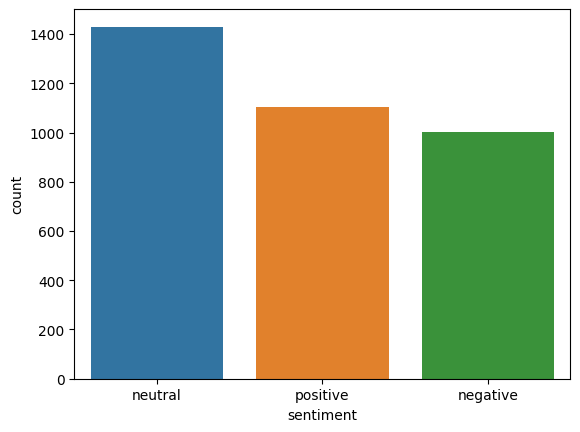

In [31]:
import seaborn as sns
sns.countplot(data=data,x='sentiment',order=data.sentiment.value_counts().index)

In [32]:
pos_neg = []
for i in range(len(data['sentiment'])):
    if data['sentiment'][i] == 'positive':
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg


In [33]:
df = data[['text','sentiment','label']]

In [34]:
df['label'].value_counts(normalize = True)

label
0    0.770924
1    0.229076
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

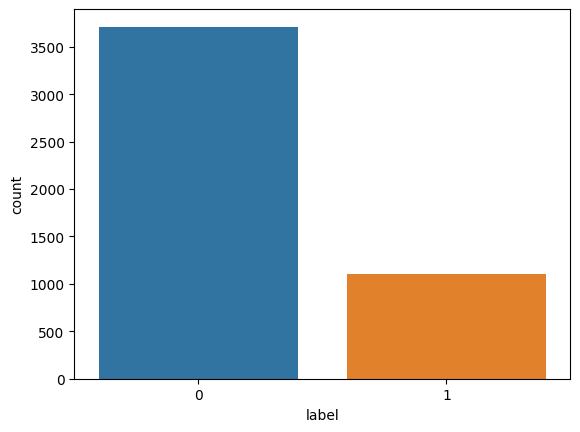

In [35]:
sns.countplot(data=df,x='label',order=df.label.value_counts().index)

In [36]:
df.head()

,text,sentiment,label
0,Last session of the day http://twitpic.com/67ezh,neutral,0
1,Shanghai is also really exciting (precisely -...,positive,1
2,"Recession hit Veronique Branquinho, she has to...",negative,0
3,happy bday!,positive,1
4,http://twitpic.com/4w75p - I like it!!,positive,1


# Data Cleaning

In [37]:
import nltk 
import re 
import string
import warnings
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [38]:
df['text'] = data['text'].astype(str)

df['text'] = df['text'].apply(lambda x: x.lower())
 
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def remove_hyperlinks(text):
    pattern = r'http[s]?://\S+|www\.\S+'
    return re.sub(pattern, '', text)

df['text'] = df['text'].apply(remove_hyperlinks)

df['text']= df['text'].apply(remove_punctuation)

# Tokenization
df['text'] = df['text'].apply(word_tokenize)

# Removing Stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])

df.head()


,text,sentiment,label
0,"[last, session, day]",neutral,0
1,"[shanghai, also, really, exciting, precisely, ...",positive,1
2,"[recession, hit, veronique, branquinho, quit, ...",negative,0
3,"[happy, bday]",positive,1
4,[like],positive,1


In [39]:
positive_senti = df[df['label']==1]
positive_txt = positive_senti['text'].tolist()

negative_senti = df[df['label']==0]
negative_txt = negative_senti['text'].tolist()


In [40]:
positive_all = " ".join([word for sent in positive_txt for word in sent ])
negative_all = " ".join([word for sent in negative_txt for word in sent])


<function matplotlib.pyplot.show(close=None, block=None)>

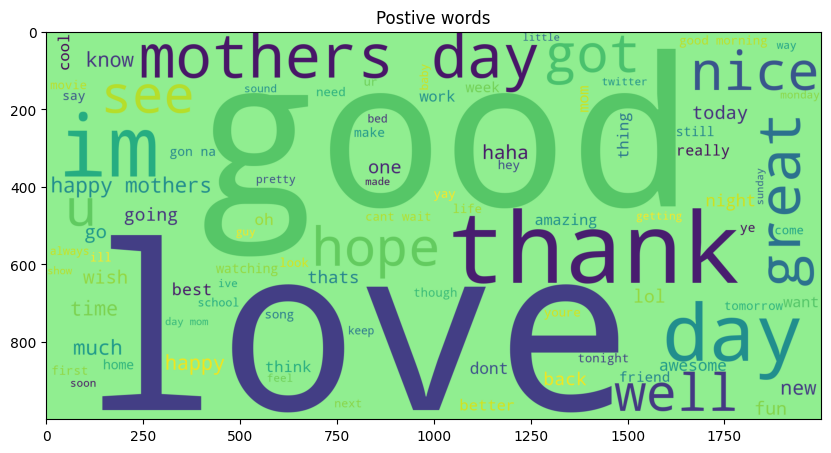

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

#postive word cloud
wordcloud = WordCloud(width=2000 , height=1000 , max_words=90 , background_color="LightGreen").generate(positive_all)
plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.title("Postive words")
plt.show

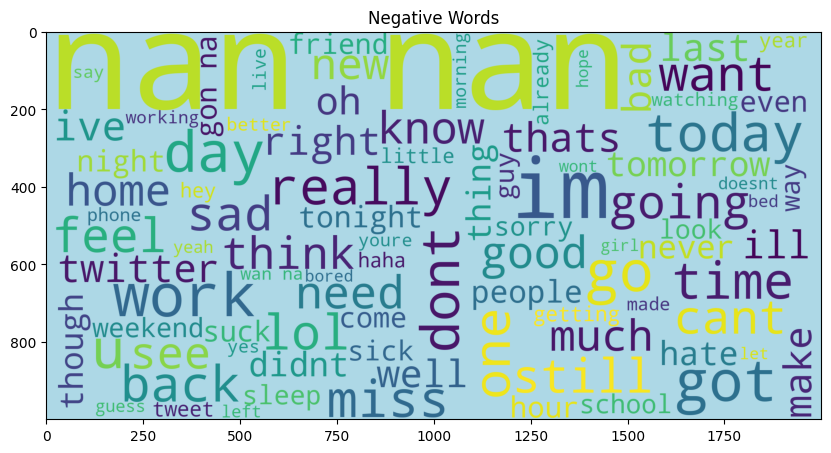

In [42]:
#negative worcloud
wordcloud = WordCloud(width=2000 , height=1000 , background_color="LightBlue" , max_words=90).generate(negative_all)
plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.title("Negative Words")
plt.show()

# Classification

In [43]:
import random
from nltk import classify
from nltk import NaiveBayesClassifier

def words_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = words_for_model(positive_txt)
negative_tokens_for_model = words_for_model(negative_txt)

positive_dataset = [(review_dict, "Positive")
                     for review_dict in positive_tokens_for_model]

negative_dataset = [(review_dict, "Negative")
                     for review_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:333091]
test_data = dataset[333091:]

classifier = NaiveBayesClassifier.train(train_data)

print(" Training Accuracy is:", round(classify.accuracy(classifier, train_data),2)*100)

print("Testing Accuracy is:", round(classify.accuracy(classifier, test_data),2)*100)

print(classifier.show_most_informative_features(10))

 Training Accuracy is: 80.0
Testing Accuracy is: 0
Most Informative Features
                 amazing = True           Positi : Negati =     57.2 : 1.0
                   thank = True           Positi : Negati =     31.2 : 1.0
                 awesome = True           Positi : Negati =     22.0 : 1.0
                    nice = True           Positi : Negati =     20.9 : 1.0
                    moms = True           Positi : Negati =     19.5 : 1.0
                   happy = True           Positi : Negati =     19.5 : 1.0
                    love = True           Positi : Negati =     18.9 : 1.0
                    luck = True           Positi : Negati =     18.2 : 1.0
                 mothers = True           Positi : Negati =     17.4 : 1.0
                  thanks = True           Positi : Negati =     17.0 : 1.0
None
